In [2]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

In [54]:
train_df = pd.read_csv('/kaggle/input/fashionmnist/fashion-mnist_train.csv')
test_df = pd.read_csv('/kaggle/input/fashionmnisttest/fashion-mnist_test.csv')
train_df.head(0)

,label,pixel1,pixel2,pixel3,pixel4,pixel5,pixel6,pixel7,pixel8,pixel9,...,pixel775,pixel776,pixel777,pixel778,pixel779,pixel780,pixel781,pixel782,pixel783,pixel784


In [55]:
train_df.shape, test_df.shape

((60000, 785), (10000, 785))

In [56]:
#labels in this dataset
train_df['label'].unique()

array([2, 9, 6, 0, 3, 4, 5, 8, 7, 1])

In [57]:
#preprocess - 
x_train = train_df.iloc[:,1:].to_numpy()
# convert 784pixels image where each pixel has value range 0-255 into 28x28x1
x_train = x_train.reshape([-1,28,28,1])
# divide values by 255 to scale the values
x_train = x_train/255

In [58]:
y_train = train_df.iloc[:,0].to_numpy()

In [59]:
x_test = test_df.iloc[:,1:].to_numpy()
x_test = x_test.reshape([-1,28,28,1])
x_test = x_test/255

In [60]:
y_test = test_df.iloc[:,0].to_numpy()

### Model define

In [61]:
from keras import Sequential
from keras.layers import Dense,Conv2D,MaxPooling2D,Dropout,Flatten

1st layer has 64 filters each extracting different features from input image. and hence output of this layer will have 64 feature maps

In [62]:
model = Sequential()
model.add(Conv2D(filters=64,kernel_size=(3,3),input_shape=(28,28,1),activation='relu'))
model.add(MaxPooling2D(pool_size=(2,2)))
model.add(Dropout(rate=0.3))
model.add(Flatten())
model.add(Dense(32,activation='relu'))
model.add(Dense(10,activation='softmax'))

model.compile(loss="sparse_categorical_crossentropy",optimizer="adam",metrics=['accuracy'])
model.summary()

/opt/conda/lib/python3.10/site-packages/keras/src/layers/convolutional/base_conv.py:99: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(


Model: "sequential_2"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ conv2d_2 (Conv2D)               │ (None, 26, 26, 64)     │           640 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_2 (MaxPooling2D)  │ (None, 13, 13, 64)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_2 (Dropout)             │ (None, 13, 13, 64)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ flatten_2 (Flatten)             │ (None, 10816)          │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_4 (Dense)                 │ (None, 32)             │       346,144 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_5 (Dense)                 │ (None, 10)             │           330 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 347,114 (1.32 MB)

 Trainable params: 347,114 (1.32 MB)

 Non-trainable params: 0 (0.00 B)

In [69]:
history = model.fit(x_train,y_train,epochs=5,batch_size=1200,validation_split=0.05)

Epoch 1/5
48/48 ━━━━━━━━━━━━━━━━━━━━ 28s 576ms/step - accuracy: 0.8922 - loss: 0.3132 - val_accuracy: 0.8890 - val_loss: 0.3189
Epoch 2/5
48/48 ━━━━━━━━━━━━━━━━━━━━ 41s 577ms/step - accuracy: 0.8939 - loss: 0.2987 - val_accuracy: 0.8900 - val_loss: 0.3128
Epoch 3/5
48/48 ━━━━━━━━━━━━━━━━━━━━ 27s 567ms/step - accuracy: 0.8978 - loss: 0.2916 - val_accuracy: 0.8807 - val_loss: 0.3257
Epoch 4/5
48/48 ━━━━━━━━━━━━━━━━━━━━ 41s 572ms/step - accuracy: 0.9000 - loss: 0.2823 - val_accuracy: 0.8980 - val_loss: 0.2948
Epoch 5/5
48/48 ━━━━━━━━━━━━━━━━━━━━ 41s 576ms/step - accuracy: 0.9039 - loss: 0.2740 - val_accuracy: 0.8947 - val_loss: 0.2975


In [70]:
acc = history.history['accuracy']
val_acc = history.history['val_accuracy']
loss = history.history['loss']
val_loss = history.history['val_loss']

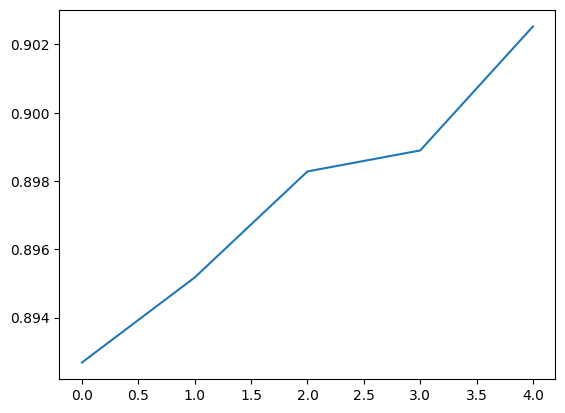

In [77]:
import matplotlib.pyplot as plt
plt.plot(acc);

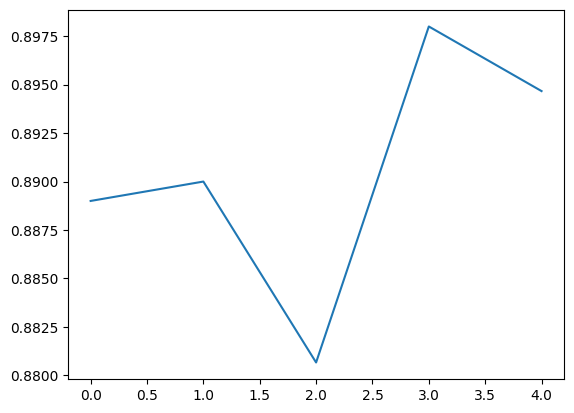

In [81]:
plt.plot(val_acc);

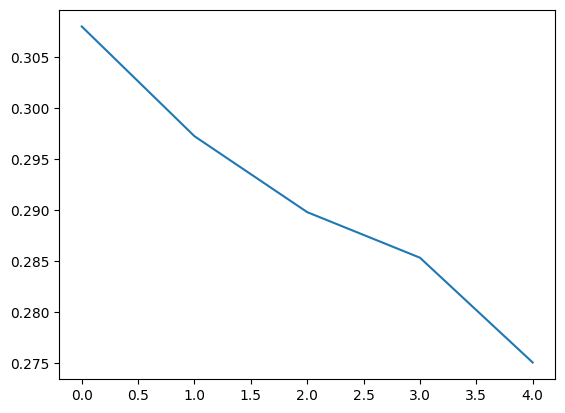

In [78]:
plt.plot(loss);

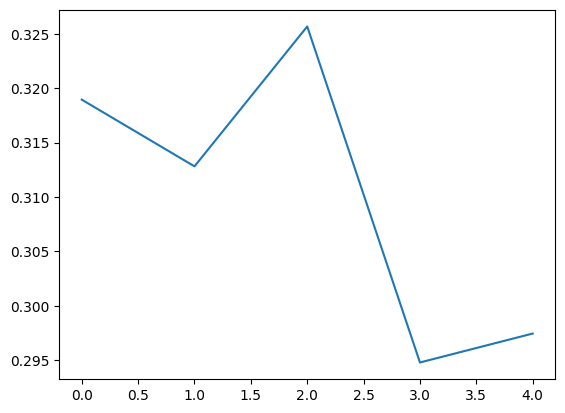

In [79]:
plt.plot(val_loss);

In [82]:
from sklearn.metrics import classification_report
y_preds = model.predict(x_test)
y_pred_labels = np.argmax(y_preds,axis=1)
report = classification_report(y_test,y_pred_labels,target_names=['0', '1', '2', '3', '4', '5', '6', '7', '8', '9'],output_dict=True)

313/313 ━━━━━━━━━━━━━━━━━━━━ 1s 4ms/step


In [83]:
pd.DataFrame(report).transpose()

,precision,recall,f1-score,support
0,0.802357,0.8850,0.841655,1000.0000
1,0.986869,0.9770,0.981910,1000.0000
2,0.824074,0.8900,0.855769,1000.0000
3,0.929696,0.8860,0.907322,1000.0000
4,0.878279,0.8370,0.857143,1000.0000
5,0.968064,0.9700,0.969031,1000.0000
6,0.758134,0.6990,0.727367,1000.0000
7,0.958035,0.9360,0.946889,1000.0000
8,0.976815,0.9690,0.972892,1000.0000
9,0.945525,0.9720,0.958580,1000.0000
